In [1]:
## Import libraries
import numpy as np
import pandas as pd
import itertools


# Import visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters import gaussian
#import visualkeras


from sklearn.metrics import confusion_matrix

# import tensorflow
import tensorflow as tf

# import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D, Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.constraints import maxnorm

from keras.preprocessing.image import ImageDataGenerator

# import CIFAR 10 dataset
from keras.datasets import cifar10

In [2]:
# Loading data & splitting to train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
# Normalize the numbers
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# One hot encode outputs as we have 10 classes
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [5]:
# Image augmentation to be able create noise
train_datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect', cval=125)

train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)

In [6]:
# Instentiate CNN model
model = Sequential()


model.add(Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, kernel_constraint = maxnorm(3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, kernel_constraint = maxnorm(3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Output 
model.add(Dense(class_num, activation = 'softmax'))

In [7]:
%%time

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=(X_test, y_test), epochs=200, batch_size = 100, steps_per_epoch = 1000)

Epoch 1/200
1000/1000 [==============================] - 30s 18ms/step - loss: 1.9588 - accuracy: 0.2968 - val_loss: 1.4767 - val_accuracy: 0.4597
Epoch 2/200
1000/1000 [==============================] - 17s 17ms/step - loss: 1.6804 - accuracy: 0.3867 - val_loss: 1.5750 - val_accuracy: 0.4287
Epoch 3/200
1000/1000 [==============================] - 17s 17ms/step - loss: 1.5725 - accuracy: 0.4285 - val_loss: 1.3971 - val_accuracy: 0.5051
Epoch 4/200
1000/1000 [==============================] - 18s 18ms/step - loss: 1.4878 - accuracy: 0.4610 - val_loss: 1.1163 - val_accuracy: 0.5993
Epoch 5/200
1000/1000 [==============================] - 17s 17ms/step - loss: 1.4301 - accuracy: 0.4859 - val_loss: 1.1082 - val_accuracy: 0.6105
Epoch 6/200
1000/1000 [==============================] - 17s 17ms/step - loss: 1.3794 - accuracy: 0.5082 - val_loss: 1.0458 - val_accuracy: 0.6268
Epoch 7/200
1000/1000 [==============================] - 17s 17ms/step - loss: 1.3335 - accuracy: 0.5251 - val_loss: 1

In [8]:
%%time
predictions = np.argmax(model.predict(X_test),axis=1)

CPU times: user 1.28 s, sys: 178 ms, total: 1.45 s
Wall time: 1.15 s


REAL LIFE PHOTOS

In [9]:
# Define Classes
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
# Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving Bird2.jpg to Bird2.jpg


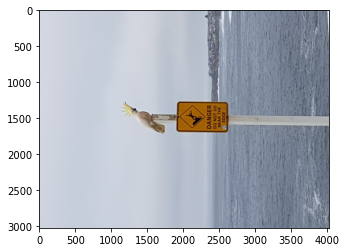

In [11]:
# Show the image
bird_image = plt.imread('Bird2.jpg')
bird_img = plt.imshow(bird_image)

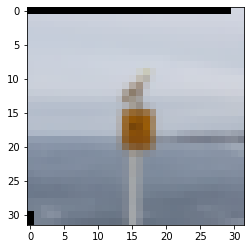

In [18]:
# Resize the image
from skimage.transform import resize
import scipy
resized_bird = resize(bird_image, (32,32,3))
resized_bird = scipy.ndimage.rotate(resized_bird, -90)
bird_img = plt.imshow(resized_bird)

In [19]:
%%time
# Get the models predictions 
bird_predictions = model.predict(np.array([resized_bird]))
# Show the predictions
bird_predictions

CPU times: user 45 ms, sys: 946 µs, total: 45.9 ms
Wall time: 43.2 ms


In [20]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = bird_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[2, 0, 8, 4, 3, 6, 7, 5, 9, 1]


In [21]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(bird_predictions[0][list_index[i]] * 100, 0), '%')

bird : 71.0 %
airplane : 24.0 %
ship : 3.0 %
deer : 1.0 %
cat : 1.0 %
CPU times: user 1.04 ms, sys: 0 ns, total: 1.04 ms
Wall time: 752 µs


In [22]:
uploaded = files.upload()

Saving Horse1.jpg to Horse1.jpg


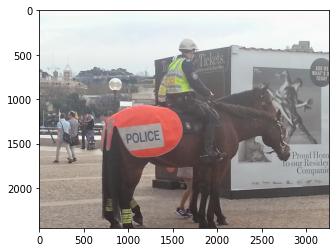

In [23]:
# Show the image
horse_image = plt.imread('Horse1.jpg')
horse_img = plt.imshow(horse_image)

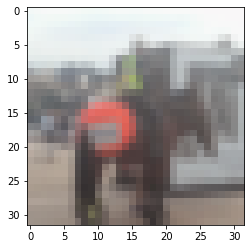

In [24]:
# Resize the image
resized_horse = resize(horse_image, (32,32,3))
horse_img = plt.imshow(resized_horse)

In [25]:
%%time
# Get the models predictions 
horse_predictions = model.predict(np.array([resized_horse]))
# Show the predictions
horse_predictions

CPU times: user 50.2 ms, sys: 1.1 ms, total: 51.3 ms
Wall time: 47.8 ms


In [26]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = horse_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[0, 9, 7, 1, 5, 2, 8, 3, 4, 6]


In [27]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(horse_predictions[0][list_index[i]] * 100, 0), '%')

airplane : 34.0 %
truck : 31.0 %
horse : 31.0 %
automobile : 2.0 %
dog : 1.0 %
CPU times: user 512 µs, sys: 0 ns, total: 512 µs
Wall time: 523 µs


In [29]:
uploaded = files.upload()

Saving Truck1.jpg to Truck1 (1).jpg


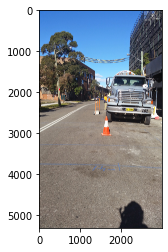

In [30]:
# Show the image
truck_image = plt.imread('Truck1.jpg')
truck_img = plt.imshow(truck_image)

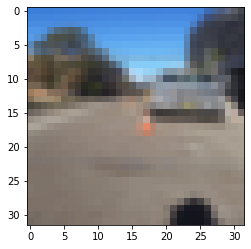

In [31]:
# Resize the image
resized_truck = resize(truck_image, (32,32,3))
truck_img = plt.imshow(resized_truck)

In [32]:
%%time
# Get the models predictions 
truck_predictions = model.predict(np.array([resized_truck]))
# Show the predictions
truck_predictions

CPU times: user 43.2 ms, sys: 4.09 ms, total: 47.3 ms
Wall time: 44.1 ms


In [33]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = truck_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[9, 0, 1, 2, 8, 7, 4, 3, 5, 6]


In [34]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(truck_predictions[0][list_index[i]] * 100, 0), '%')

truck : 55.0 %
airplane : 24.0 %
automobile : 13.0 %
bird : 3.0 %
ship : 2.0 %
CPU times: user 359 µs, sys: 0 ns, total: 359 µs
Wall time: 365 µs


In [35]:
uploaded = files.upload()

Saving Ship2.jpg to Ship2.jpg


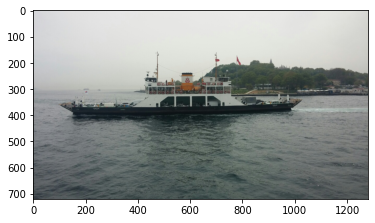

In [36]:
# Show the image
ship_image = plt.imread('Ship2.jpg')
ship_img = plt.imshow(ship_image)

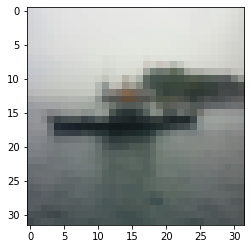

In [37]:
# Resize the image
resized_ship = resize(ship_image, (32,32,3))
ship_img = plt.imshow(resized_ship)

In [38]:
%%time
# Get the models predictions 
ship_predictions = model.predict(np.array([resized_ship]))
# Show the predictions
ship_predictions

CPU times: user 45.9 ms, sys: 2.09 ms, total: 48 ms
Wall time: 45 ms


In [39]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = ship_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[8, 0, 9, 1, 2, 4, 3, 6, 5, 7]


In [40]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(ship_predictions[0][list_index[i]] * 100, 0), '%')

ship : 95.0 %
airplane : 5.0 %
truck : 0.0 %
automobile : 0.0 %
bird : 0.0 %
CPU times: user 448 µs, sys: 0 ns, total: 448 µs
Wall time: 459 µs


In [41]:
uploaded = files.upload()

Saving Frog1.jpg to Frog1.jpg


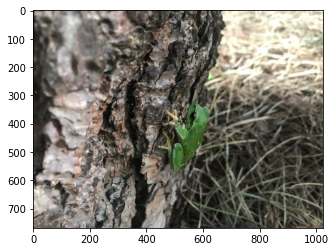

In [42]:
# Show the image
frog_image = plt.imread('Frog1.jpg')
frog_img = plt.imshow(frog_image)

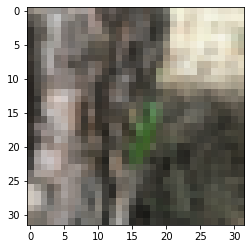

In [43]:
# Resize the image
resized_frog = resize(frog_image, (32,32,3))
frog_img = plt.imshow(resized_frog)

In [44]:
%%time
# Get the models predictions 
frog_predictions = model.predict(np.array([resized_frog]))
# Show the predictions
frog_predictions

CPU times: user 45.3 ms, sys: 2 ms, total: 47.3 ms
Wall time: 43.9 ms


In [45]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = frog_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[6, 4, 3, 2, 5, 7, 9, 0, 1, 8]


In [46]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(frog_predictions[0][list_index[i]] * 100, 0), '%')

frog : 65.0 %
deer : 19.0 %
cat : 8.0 %
bird : 6.0 %
dog : 2.0 %
CPU times: user 339 µs, sys: 1 ms, total: 1.34 ms
Wall time: 993 µs


In [47]:
uploaded = files.upload()

Saving Chacha2.jpeg to Chacha2.jpeg


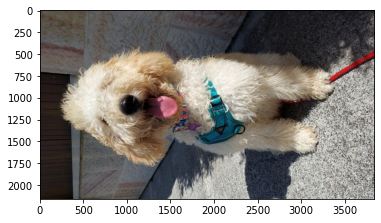

In [48]:
# Show the image
chacha_image = plt.imread('Chacha2.jpeg')
chacha_img = plt.imshow(chacha_image)

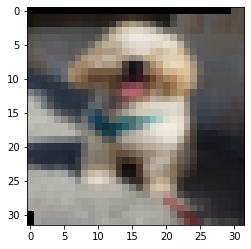

In [49]:
# Resize the image
resized_chacha = resize(chacha_image, (32,32,3))
resized_chacha = scipy.ndimage.rotate(resized_chacha, -90)
chacha_img = plt.imshow(resized_chacha)

In [50]:
%%time
# Get the models predictions 
chacha_predictions = model.predict(np.array([resized_chacha]))
# Show the predictions
chacha_predictions

CPU times: user 50 ms, sys: 921 µs, total: 50.9 ms
Wall time: 48.2 ms


In [51]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = chacha_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[5, 7, 2, 3, 4, 6, 9, 8, 0, 1]


In [52]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(chacha_predictions[0][list_index[i]] * 100, 0), '%')

dog : 94.0 %
horse : 2.0 %
bird : 2.0 %
cat : 1.0 %
deer : 0.0 %
CPU times: user 855 µs, sys: 0 ns, total: 855 µs
Wall time: 679 µs


In [54]:
uploaded = files.upload()

Saving Budha1.jpg to Budha1.jpg


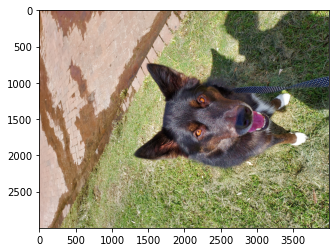

In [55]:
# Show the image
budha_image = plt.imread('Budha1.jpg')
budha_img = plt.imshow(budha_image)

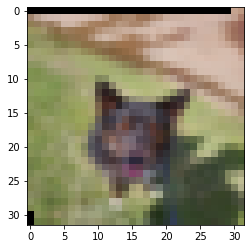

In [56]:
# Resize the image
resized_budha = resize(budha_image, (32,32,3))
resized_budha = scipy.ndimage.rotate(resized_budha, -90)
budha_img = plt.imshow(resized_budha)

In [57]:
%%time
# Get the models predictions 
budha_predictions = model.predict(np.array([resized_budha]))
# Show the predictions
budha_predictions

CPU times: user 47.5 ms, sys: 1.01 ms, total: 48.5 ms
Wall time: 45.6 ms


In [58]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = budha_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[5, 4, 2, 3, 7, 6, 9, 0, 8, 1]


In [59]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(budha_predictions[0][list_index[i]] * 100, 0), '%')

dog : 43.0 %
deer : 16.0 %
bird : 15.0 %
cat : 15.0 %
horse : 6.0 %
CPU times: user 0 ns, sys: 894 µs, total: 894 µs
Wall time: 629 µs


In [60]:
uploaded = files.upload()

Saving Romeo1.jpg to Romeo1.jpg


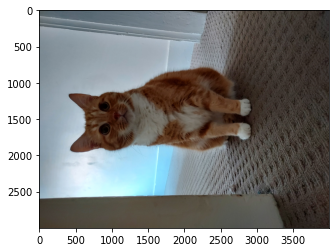

In [61]:
# Show the image
romeo_image = plt.imread('Romeo1.jpg')
romeo_img = plt.imshow(romeo_image)

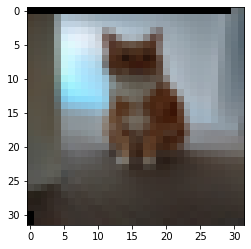

In [62]:
# Resize the image
resized_romeo = resize(romeo_image, (32,32,3))
resized_romeo = scipy.ndimage.rotate(resized_romeo, -90)
romeo_img = plt.imshow(resized_romeo)

In [63]:
%%time
# Get the models predictions 
romeo_predictions = model.predict(np.array([resized_romeo]))
# Show the predictions
romeo_predictions

CPU times: user 47.6 ms, sys: 3.94 ms, total: 51.6 ms
Wall time: 49 ms


In [64]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = romeo_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[3, 5, 7, 2, 0, 9, 4, 6, 1, 8]


In [65]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(romeo_predictions[0][list_index[i]] * 100, 0), '%')

cat : 72.0 %
dog : 26.0 %
horse : 1.0 %
bird : 0.0 %
airplane : 0.0 %
CPU times: user 1.13 ms, sys: 9 µs, total: 1.14 ms
Wall time: 821 µs


In [66]:
uploaded = files.upload()

Saving Truck3.jpg to Truck3.jpg


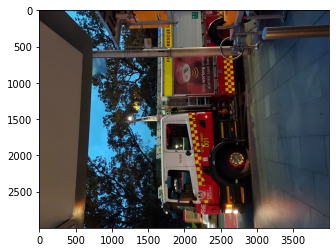

In [67]:
# Show the image
truck3_image = plt.imread('Truck3.jpg')
truck_img = plt.imshow(truck3_image)

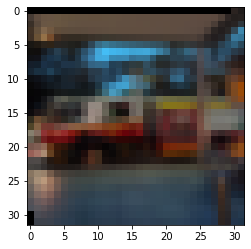

In [68]:
# Resize the image
resized_truck3 = resize(truck3_image, (32,32,3))
resized_truck3 = scipy.ndimage.rotate(resized_truck3, -90)
truck3_img = plt.imshow(resized_truck3)

In [69]:
%%time
# Get the models predictions 
truck3_predictions = model.predict(np.array([resized_truck3]))
# Show the predictions
truck3_predictions

CPU times: user 44.6 ms, sys: 4.03 ms, total: 48.6 ms
Wall time: 45.8 ms


In [70]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = truck3_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[1, 9, 8, 0, 6, 3, 2, 5, 7, 4]


In [71]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(truck3_predictions[0][list_index[i]] * 100, 0), '%')

automobile : 82.0 %
truck : 14.0 %
ship : 1.0 %
airplane : 1.0 %
frog : 1.0 %
CPU times: user 1.28 ms, sys: 0 ns, total: 1.28 ms
Wall time: 906 µs


In [72]:
uploaded = files.upload()

Saving Car1.jpg to Car1.jpg


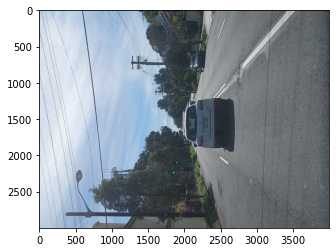

In [73]:
# Show the image
Car1_image = plt.imread('Car1.jpg')
Car1_img = plt.imshow(Car1_image)

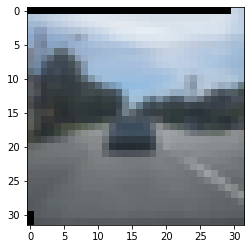

In [74]:
# Resize the image
resized_Car1 = resize(Car1_image, (32,32,3))
resized_Car1 = scipy.ndimage.rotate(resized_Car1, -90)
Car1_img = plt.imshow(resized_Car1)

In [75]:
%%time
# Get the models predictions 
Car1_predictions = model.predict(np.array([resized_Car1]))
# Show the predictions
Car1_predictions

CPU times: user 46.3 ms, sys: 2.99 ms, total: 49.3 ms
Wall time: 46.4 ms


In [76]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = Car1_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[0, 8, 9, 1, 2, 7, 3, 4, 5, 6]


In [77]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(Car1_predictions[0][list_index[i]] * 100, 0), '%')

airplane : 80.0 %
ship : 9.0 %
truck : 5.0 %
automobile : 5.0 %
bird : 1.0 %
CPU times: user 1.04 ms, sys: 4 µs, total: 1.04 ms
Wall time: 731 µs


In [78]:
uploaded = files.upload()

Saving Car2.jpg to Car2.jpg


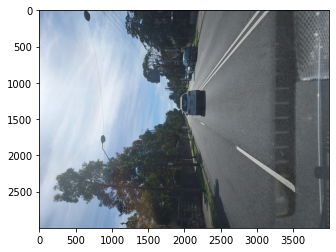

In [79]:
# Show the image
Car2_image = plt.imread('Car2.jpg')
Car2_img = plt.imshow(Car2_image)

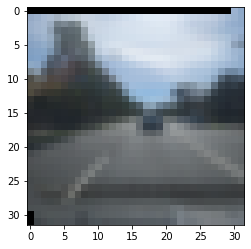

In [80]:
# Resize the image
resized_Car2 = resize(Car2_image, (32,32,3))
resized_Car2 = scipy.ndimage.rotate(resized_Car2, -90)
Car2_img = plt.imshow(resized_Car2)

In [81]:
%%time
# Get the models predictions 
Car2_predictions = model.predict(np.array([resized_Car2]))
# Show the predictions
Car2_predictions

CPU times: user 46.5 ms, sys: 2.12 ms, total: 48.6 ms
Wall time: 45.7 ms


In [82]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = Car2_predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[0, 7, 8, 9, 2, 3, 4, 1, 5, 6]


In [83]:
%%time
# Print the first 5 most likely predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(Car2_predictions[0][list_index[i]] * 100, 0), '%')

airplane : 76.0 %
horse : 7.0 %
ship : 7.0 %
truck : 5.0 %
bird : 2.0 %
CPU times: user 6.35 ms, sys: 0 ns, total: 6.35 ms
Wall time: 5.64 ms
